<a href="https://www.kaggle.com/code/gauravrj/ipl-data-analysis-using-python?scriptVersionId=122121044" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

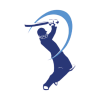 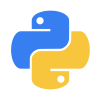

# IPL Data Analysis using Python 

The following dataset consist of all the data about IPL matches played from the year 2008-2019. IPL is a professional 20-20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. It is one of the most popular sports which is infamous worldwide. So let's analyze IPL through the stats.

## Objectives

1. To find the team that won the most number of matches in a season.
2. To find the team that lost the most number of matches in a season.
3. Does winning toss increases the chances of victory.
4. To find the player with the most player of the match awards.
5. To find the city that hosted the maximum number of IPL matches.
6. To find the most winning team for each season.
7. To find the on-field umpire with the maximum number of IPL matches

### Let's start with Data Preparation and Data Cleaning

In [1]:
#Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dlf_ipl = pd.read_csv("/kaggle/input/ipldatasets/matches.csv")
dlf_ipl

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
dlf_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
dlf_ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations
**The following conclusion can be made from the describe() method:**
1. The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
2. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
3. More than 75% of the victories came by the teams who batted first, and won by a margin of 19 runs.
4. More than 75% of the victories came by the teams that batted second, and won by a margin of 6 wickets.
5. There were 756 IPL matches hosted from the year 2008-2019.

In [5]:
dlf_ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Let's view the unique values of each column to help us understand the dataset better.**

In [6]:
for col in dlf_ipl:
    print(dlf_ipl[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

### The dataset has 18 columns. Let's get acquainted with the columns.

* **id:** IPL match id.
* **season:** IPL season(years)
* **city:** The city where the IPL match was held.
* **date:** The date on which the match was held.
* **team1:** Group1 teams of the IPL match
* **team2:** Group2 team of the IPL match
* **toss_winner:** The team that won the toss
* **toss_decision:** The decision taken by the team that won the toss to 'bat' or 'bowl'
* **result:** The result('normal', 'tie', 'no result') of the match.
* **dl_applied:** (1 or 0)indicates whether Duckworth-Lewis rule was applied or not.
* **winner:** Winner of the match.
* **win_by_runs:** Provides the runs by which the team batting first won
* **win_by_runs:** Provides the number of wickets by which the team batting second won.
* **player_of_match:** The outstanding player of the match.
* **venue:** The venue where the match was played.
* **umpire1:** One of the two on-field umpires who officiate the match.
* **umpire2:** One of the two on-field umpires who officiate the match.
* **umpire3:** The off-field umpire who officiates the match

**The columns indicates the presence of NaN values in the 'umpire3' column. Let's see the count of NaN values in the column.**

In [7]:
#the first index that doesn't contain a NaN value 
dlf_ipl.umpire3.first_valid_index()

636

In [8]:
#Confirming the first valid index
dlf_ipl.loc[630:640]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan


**It is imperative to know the count of NaN values for each column before we proceed further.**

In [9]:
dlf_ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

The column 'umpire3' has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [10]:
dlf_ipl = dlf_ipl.drop(columns=['umpire3'], axis=1)

In [11]:
#Check whether the "umpire3" column dropped or not!?
dlf_ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


**Now that our dataset has been cleaned up, it's time to do the in-depth analysis and visualization.**

In [12]:
#Snippet
# sns.set_style('darkgrid')
# sns.set_style('whitegrid')
# %matplotlib inline
# sns.color_palette("Paired")
# matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (12, 8)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

### The team with most number of wins per season.

**Let's analyze the team with the most wins in each season.**

In [13]:
team_wins_per_seasons = dlf_ipl.groupby(['season'])['winner'].value_counts()
team_wins_per_seasons

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [14]:
#code
year = 2008
winning_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team_wins_per_seasons.iteritems():    
    if items[0][0]==year:
        print(items)
        winning_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        winning_per_season_df = winning_per_season_df.append(winning_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


**After analyzing the dataset we can see Mumbai Indians has won 4 times (2010, 2013, 2017, 2019) and Chennai Super Kings has won thrice (2011, 2015 and 2018) respectively. Both this teams are undeniably the best teams in IPL.**

In [15]:
winning_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


**The number of wins is a discrete value. Hence, we will plot a barchart using Seaborn Library in python.**

<AxesSubplot:xlabel='wins', ylabel='team'>

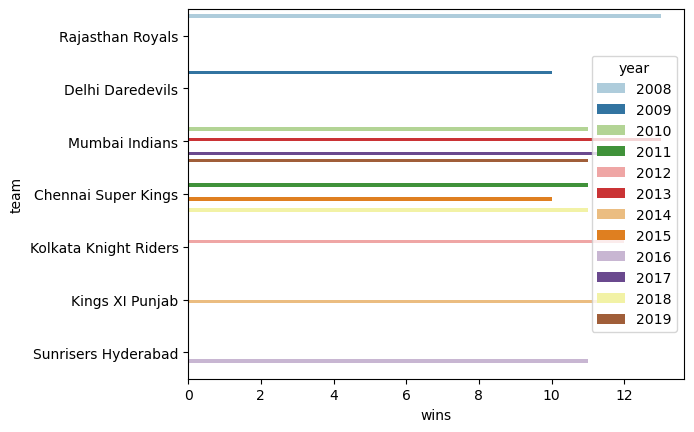

In [16]:
#Barplot
sns.barplot( data = winning_per_season_df, x='wins', y='team', hue='year', palette='Paired')

**So from the folowing barplot, we can easily make conclusion regarding the year in which a particular team has scored the maximum wins.**

### Observations
* **Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).**
* **After Mumbai Indians,Chennai Super Kings has secured most wins in three seasons(2011, 2015 and 2018).**

### Venue that hosted the maximum number of matches

In [17]:
venues = dlf_ipl['venue'].value_counts()
venues

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [18]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venues.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

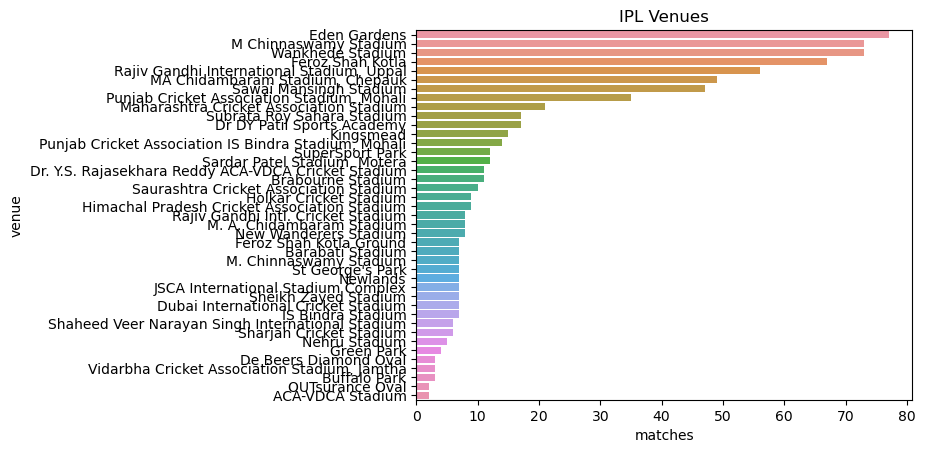

In [19]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [20]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


### Observations
* **Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.**
* **Till 2019, IPL matches were hosted by 40 venues.**

### The most successful IPL team

In [21]:
most_win_teams = dlf_ipl['winner'].value_counts()
most_win_teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [22]:
most_win_teams_df = pd.DataFrame(columns=['team', 'wins'])
for items in most_win_teams.iteritems():
    temp_df1 = pd.DataFrame({
        'team' : [items[0]],
        'wins' : [items[1]]
    })
    most_win_teams_df = most_win_teams_df.append(temp_df1, ignore_index=True)

In [23]:
most_win_teams_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


<AxesSubplot:title={'center':'Total Winnings of IPL Team'}, xlabel='wins', ylabel='team'>

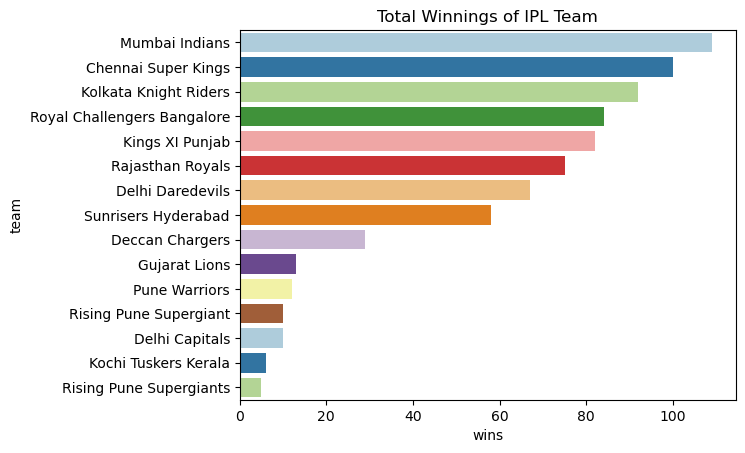

In [24]:
plt.title("Total Winnings of IPL Team")
sns.barplot(data = most_win_teams_df, x = "wins", y='team', palette='Paired')

### Observations:
**Mumbai Indians is the most successful team as they have won the maximum number of IPL matches(109) followed by Chennai Super Kings(100) and Kolkata Knight Riders(92)**

### Most Valuable Player

In [25]:
mvp = dlf_ipl['player_of_match'].value_counts()
mvp

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [26]:
mvp_player = pd.DataFrame(columns=['player','wins'])
count = 0
for items in mvp.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player' : [items[0]],
            'wins' : [items[1]]
        })
        mvp_player=mvp_player.append(temp_df2, ignore_index=True)
        count += 1

In [27]:
mvp_player

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


<AxesSubplot:title={'center':'Top 10 Most valuable Player'}, xlabel='wins', ylabel='player'>

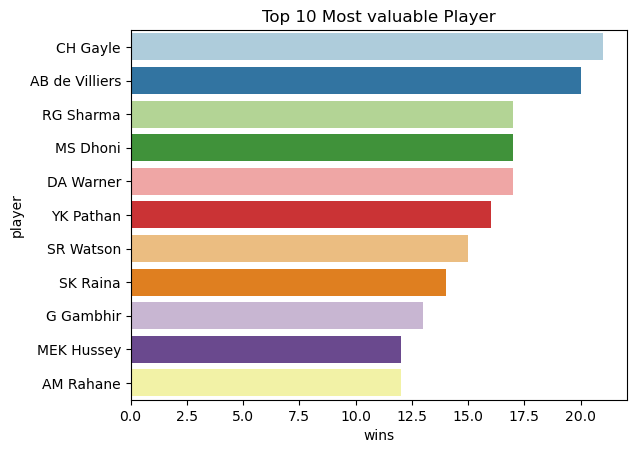

In [28]:
plt.title("Top 10 Most valuable Player")
sns.barplot(data=mvp_player, x= 'wins', y='player', palette='Paired')

### Observations:
**Cris Gayle is the player is the most valuable player.**

### Team that won the most number of toss

In [29]:
team_toss = dlf_ipl['toss_winner'].value_counts()
team_toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [30]:
toss_winner_df = pd.DataFrame(columns=['team', 'wins'])
for items in team_toss.iteritems():
    temp_df3 = pd.DataFrame({
        'team' : [items[0]],
        'wins' : [items[1]]
    })
    toss_winner_df = toss_winner_df.append(temp_df3, ignore_index=True)

In [31]:
toss_winner_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


<AxesSubplot:title={'center':'Which IPL team won more tosses?'}, xlabel='wins', ylabel='team'>

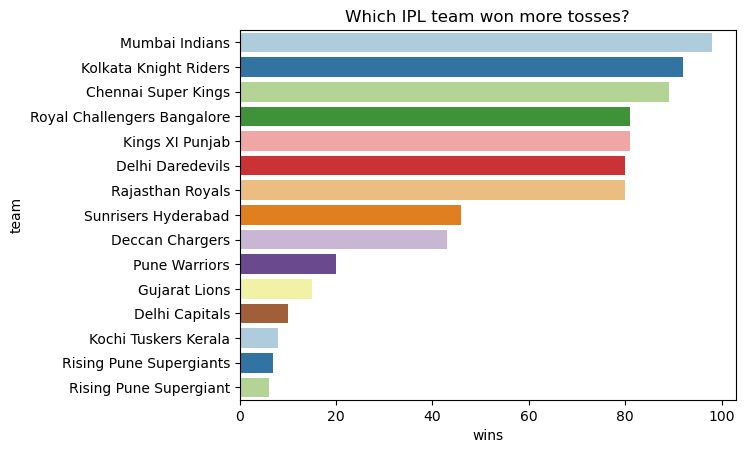

In [32]:
plt.title("Which IPL team won more tosses?")
sns.barplot(data= toss_winner_df, x='wins', y='team', palette="Paired")

### Observations:
**Mumbai Indians has won the most toss in IPL history(till 2019).**

***Till now, we have delve into basic operations such as which team has won the most IPL, and more. Let's try to delve into deeper analytics and get the answers to more questions. ***

### Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?
We have figured out the top ten players of IPL using the 'Player of the Match' title. It is interesting to know that the top two players - Chris Gayle and AB de Villers have never won an IPL whereas, the other **6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir)** have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.

In [33]:
mvp_player

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


### Q2: Which umpire has attended the most number of IPL matches on-field?

In [34]:
umpire1_df = dlf_ipl['umpire1'].value_counts()
umpire2_df = dlf_ipl['umpire2'].value_counts()

In [35]:
umpires_df = pd.concat([umpire1_df, umpire2_df], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [36]:
ump_df = umpires_df.sum(axis=1)
ump_df

HDPK Dharmasena          87.0
Asad Rauf                51.0
S Ravi                  106.0
AK Chaudhary             58.0
Aleem Dar                38.0
                        ...  
K Srinivasan              3.0
KN Anantapadmanabhan      3.0
SD Ranade                 2.0
Nand Kishore              1.0
Subroto Das               1.0
Length: 75, dtype: float64

In [37]:
umpire_df = pd.DataFrame(columns=['umpire', 'matches'])
for items in ump_df.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire' : [items[0]],
        'matches' : [items[1]]
    })
    umpire_df = umpire_df.append(temp_df4, ignore_index=True)

In [38]:
umpire_df.sort_values('matches', ascending=False).head(10)

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0
7,M Erasmus,54.0
1,Asad Rauf,51.0
6,BR Doctrove,42.0
8,Nitin Menon,42.0
9,RE Koertzen,41.0


**S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field,** followed by HDPK Dharmasena and C Shamshuddin.

### Q3: Which team is the most successful team in IPL?

We have narrowed down on the list of teams that made the most number of wins in each season. The DataFrame winning_per_season_df gives the required information. Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019). Mumbai Indians won the IPL trophy in 2013, 2015, 2017, and 2019.

In [39]:
winning_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


**Mumbai Indians secured the most number of wins(109) in IPL, followed by Chennai Super Kings(100).**

In [40]:
most_win_teams_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


### Q4: Which city has hosted the maximum number of IPL matches?

In [41]:
ipl_city_matches_df= dlf_ipl['city'].value_counts()
ipl_city_matches_df

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [42]:
city_df = pd.DataFrame(columns=['city', 'matches'])
for items in ipl_city_matches_df.iteritems():
    temp_df5 = pd.DataFrame({
        'city' : [items[0]],
        'matches' : [items[1]]
    })
    city_df = city_df.append(temp_df5, ignore_index=True)

<AxesSubplot:title={'center':'Cities that hosted most no. of IPL matches'}, xlabel='matches', ylabel='city'>

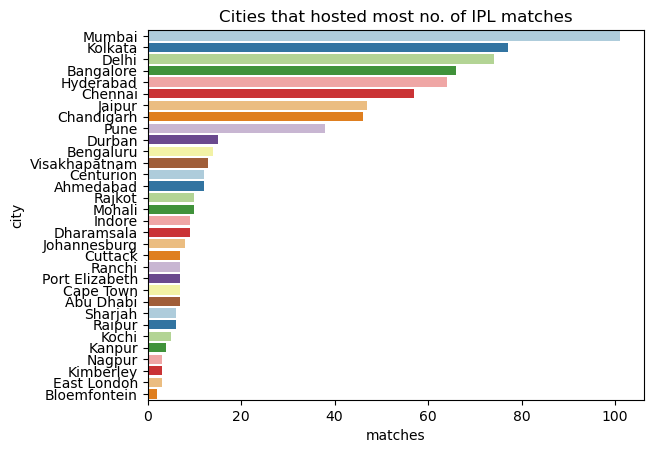

In [43]:
plt.title("Cities that hosted most no. of IPL matches")
sns.barplot(data = city_df, x ='matches', y = 'city', palette = "Paired")

**Mumbai has hosted the maximum number of IPL matches, followed by Kolkata, Delhi and Bangalore**

### Q5: Does winning the toss has any advantage?

In [44]:
winning_count = 0
for index, value in dlf_ipl.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        winning_count += 1

print(f'The number of times the team winning toss have won: {winning_count}')
prob = winning_count/len(dlf_ipl)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


**The probability of winning when the team had won the toss is 52%.** So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

### Q6: What are the major victories in IPL? Is it better to defend or chase in IPL?

In [45]:
len(dlf_ipl)

756

In [46]:
defend_df = dlf_ipl['win_by_runs'].value_counts()
defend_df.sort_values(ascending=True)

118      1
130      1
60       1
87       1
62       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

* Out of the 756 IPL matches played from 2008-2019, **419 matches were won chasing the target**. Hence, more victories were registered by teams chasing a total than defending the total.

* **When defending a total, the biggest victory was by 118 runs**. Let's find out that particular match.

In [47]:
score = 118
for index, row in dlf_ipl.iterrows():
    if(row['win_by_runs']==score):
        print(row)

id                                              11147
season                                           2019
city                                        Hyderabad
date                                         31/03/19
team1                             Sunrisers Hyderabad
team2                     Royal Challengers Bangalore
toss_winner               Royal Challengers Bangalore
toss_decision                                   field
result                                         normal
dl_applied                                          0
winner                            Sunrisers Hyderabad
win_by_runs                                       118
win_by_wickets                                      0
player_of_match                            J Bairstow
venue              Rajiv Gandhi Intl. Cricket Stadium
umpire1                                        S Ravi
umpire2                          KN Anantapadmanabhan
Name: 706, dtype: object


**The greatest victory in IPL on defending a total is for Sunrisers Hyderabad when they defeated Royal Challengers Bangalore by 118 runs on 31 March 2019 at Rajiv Gandhi International Cricket Stadium, Hyderabad.**

In [48]:
chase_df = dlf_ipl['win_by_wickets'].value_counts()
chase_df

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

* Out of the 756 IPL matches played from 2008-2019, **350 matches were won defending the total**.
* When chasing a target, **the biggest victory was by 10 wickets**(without losing any wickets). There were 11 such instances and we can find the details about those matches by the following code snippet:

In [49]:
wickets = 10
for index, row in dlf_ipl.iterrows():
    if(row['win_by_wickets']==wickets):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [50]:
chasing_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chase_df.iteritems():
    temp_df6 = pd.DataFrame({
        'victory_margin' : [items[0]],
        'instances' : [items[1]]
    })
    chasing_df = chasing_df.append(temp_df6, ignore_index=True)

In [51]:
#To drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_victory = chasing_df.drop([0]) 
chasing_victory

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


<AxesSubplot:title={'center':'IPL Victories in Number while chasing'}, xlabel='victory_margin', ylabel='instances'>

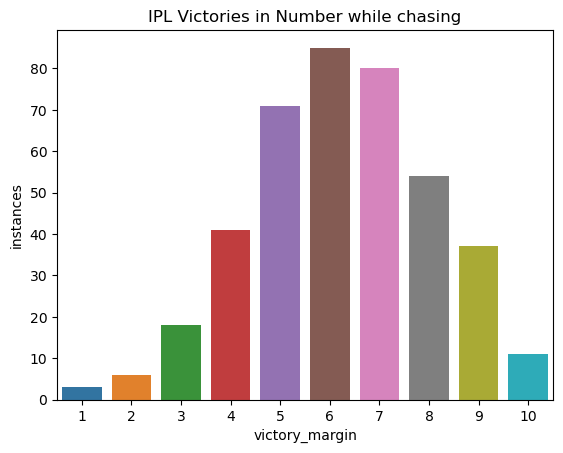

In [52]:
plt.title("IPL Victories in Number while chasing")
sns.barplot(data=chasing_victory, x = 'victory_margin', y = 'instances')

## Conclusion

Let’s summarize the important observations we made during Exploratory Data Analysis:
* **Mumbai Indians is the most successful team in IPL**.
* **Mumbai Indians has won the most number of toss**.
* **There were more matches won by chasing the total(419 matches) than defending(350 matches)**.
* **When defending a total, the biggest victory was by 118 runs(Sunrisers Hyderabad defeated Royal Challengers Bangalore by 118 runs on 31st March 2019 at Rajiv Gandhi International Cricket Stadium, Hyderabad.**.
* **When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances**.
* **Mumbai city has hosted the most number of IPL matches(101)**.
* **Chris Gayle has won the maximum number of player of the match title**.
* **Winning toss gives a slight edge(52% probability of winning) against the opponents**.
* **Five Indian players have figured in the top ten IPL players list**.
* **S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field**.
* **Eden Gardens has hosted the maximum number of IPL matches(77)**.
* **40 venues have hosted 756 IPL matches till 2019**.